# Data Mining Assignment 3

## Task 1: Labor Negotiations

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in file with semicolon delimiter
df = pd.read_csv('data/labor_negotiationsStudents.csv', ';')

# check how the data looks
print(df.head())
# check data types
print(df.dtypes)
print('\nRows=' + str(len(df.index)) + '\n')
print('Columns=' + str(len(df.columns)) + '\n')
print('Number of NaN:''\n')
df.isna().sum()
print(df)

   profession  duration  wage1  wage2  wage3 cola  hours pension  stby_pay  \
0           1       2.0   2.47    NaN   2.46  NaN   41.0    none       2.0   
1           2       1.0   1.99   3.04    NaN   tc   36.0    none       NaN   
2           3       1.0   2.97    NaN   5.02   tc   40.0     NaN       NaN   
3           4       1.0  -4.51   3.98    NaN  NaN   39.0     NaN       NaN   
4           5       2.0  -4.51   3.96    NaN   tc   38.0    none       NaN   

   shift_diff educ_allow  holidays       vacation lngtrm_disabil dntl_ins  \
0         4.0        NaN      12.0  below average            NaN      NaN   
1         4.0         no      13.0  below average            NaN      NaN   
2        25.0      maybe      10.0  below average            NaN     half   
3         NaN        NaN       9.0        average            NaN      NaN   
4         NaN        NaN       NaN        average            NaN     half   

  breavement Empl.hplan consent  
0        NaN       half      ??  


c:\users\stadl\pycharmprojects\data-mining-ws-21\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


## profession

Amount of NULL values

False
0
0


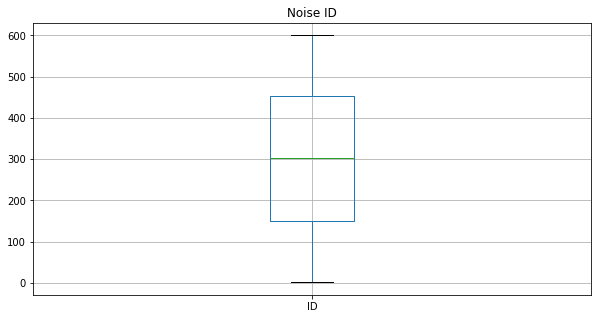

In [195]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

# get duplicates
pd.concat(g for _, g in df.groupby("profession") if len(g) > 1)
# remove them
df = df[~df.index.duplicated(keep='first')]

# profession is actually an ID so rename it
df = df.rename(columns={'profession': 'ID'})

s = pd.Series(df['ID'])
for x in s:
    # check if all values are integers
    if type(x) is not type(1):
        print(x)
    # check if all values are in valid range
    if x > 600 or x < 1:
        print(x)

# check if a value is missing
print('Amount of NULL values\n')
print(s.isnull().values.any())
print(s.isna().sum())
print(s.isnull().sum())

# check noise
df.boxplot(
    column=['ID'],
    figsize=(10, 5))
plt.title('Noise ID')
plt.savefig('exports/01_id_noise.pdf')
plt.show()

## duration

Amount of NULL values

True
11
11
2.0882852292020373
False
0
0


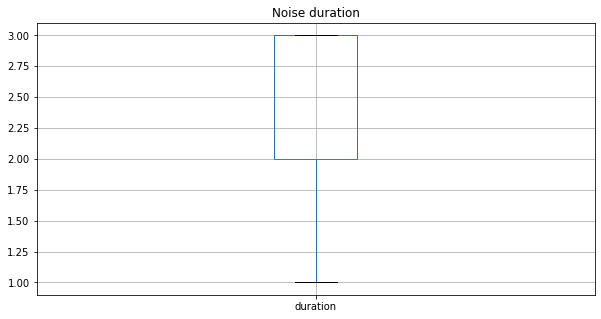

In [196]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

s = pd.Series(df['duration'])
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if all values are in valid range
    if x > 7 or x < 1:
        print('Out of range: ' + str(x))

# check if a value is missing
print('Amount of NULL values\n')
print(s.isnull().values.any())
print(s.isna().sum())
print(s.isnull().sum())
print(s.mean())
# replace 11 NaN-Values with mean value
df.duration.fillna(s.mean(), inplace=True)
print(s.isnull().values.any())
print(s.isna().sum())
print(s.isnull().sum())

# check noise
df.boxplot(
    column=['duration'],
    figsize=(10, 5))
plt.title('Noise duration')
plt.savefig('exports/02_duration_noise.pdf')
plt.show()

## wages

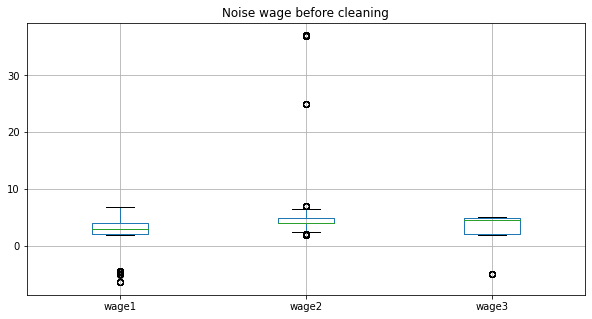

In [197]:
df.boxplot(column=['wage1', 'wage2', 'wage3'],
           figsize=(10, 5))
plt.title('Noise wage before cleaning')
plt.savefig('exports/03_wages_with_orig_noise.pdf')
plt.show()

## wage1

Acceptable range: [2.0 - 7.0]

Zeros: 0

Negative: 73

Negative out of range if would be positive: 0

Positive out of range: 46

Min: -6.43

---- converted to positive ----

Negative: 0

---- rounded up to 2.0 ----

Amnt. of values below 2.0: 0

Min: 2.0

Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 22/22
Mean:3.6332525951557093
---- NULL values after cleaning ----

Null values exist: False
Amount of NaN/NULL values: 0/0
Mean: 3.633252595155709


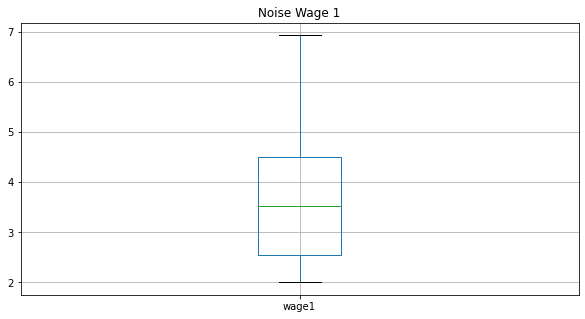

In [198]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability


s = pd.Series(df['wage1'])
count_neg = 0
count_zero = 0
count_pos_out_of_range = 0
count_neg_out_of_range = 0
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if positive but not in range
    if 2.0 > x > 0:
        count_pos_out_of_range += 1
    # check if negative and if would be positive are out of range
    if 0 > x > -2.0 or x < -7.0:
        count_neg_out_of_range += 1
    # check if is 0
    if x == 0:
        count_zero += 1
    if x < 0:
        count_neg += 1

print('Acceptable range: [2.0 - 7.0]\n')
print('Zeros: ' + str(count_zero) + '\n')
print('Negative: ' + str(count_neg) + '\n')
print('Negative out of range if would be positive: ' + str(count_neg_out_of_range) + '\n')
print('Positive out of range: ' + str(count_pos_out_of_range) + '\n')
print('Min: ' + str(df.wage1.min()) + '\n')

# making negative to positive
df.wage1 = df.wage1.abs()

print('---- converted to positive ----\n')
print('Negative: ' + str(df.wage1.lt(0).sum()) + '\n')

# round all values beneath 2.0 up to 2.0
df.loc[df.wage1 < 2.0, 'wage1'] = 2.0
print('---- rounded up to 2.0 ----\n')
print('Amnt. of values below 2.0: ' + str(df.wage1.lt(2.0).sum()) + '\n')
print('Min: ' + str(df.wage1.min()) + '\n')

# check if a value is missing
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Mean:' + str(s.mean()))
# # replace 11 NaN-Values with mean value
df.wage1.fillna(s.mean(), inplace=True)
print('---- NULL values after cleaning ----\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Mean: ' + str(s.mean()))
# check noise
df.boxplot(
    column=['wage1'],
    figsize=(10, 5))
plt.title('Noise Wage 1')
plt.savefig('exports/04_wage1_noise.pdf')
plt.show()

## wage2

Acceptable range: [2.0 - 7.0]

Zeros: 0
Negative: 0
Negative out of range if would be positive: 0
Positive in range 0 to 2.0: 13
Positive in range > 7.0: 43
Min: 1.96
Max: 37.04
---- rounded up to 2.0 ----

Amnt. of values below 2.0: 0

Min: 2.0

Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 129/129
---- NULL values after cleaning ----

Null values exist: True
Amount of NaN/NULL values: 172/172
Mean: 4.006728971962617


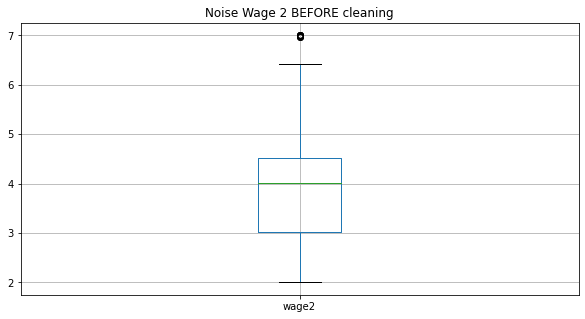

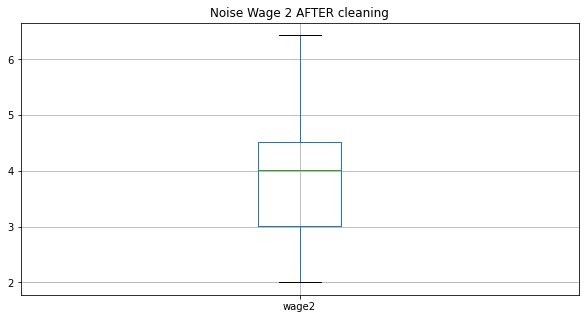

In [199]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

s = pd.Series(df['wage2'])
count_neg = 0
count_zero = 0
count_pos_out_of_range = 0
count_neg_out_of_range = 0
count_pos_out_of_range_upper = 0

for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if positive but not in range
    if 2.0 > x > 0:
        count_pos_out_of_range += 1
    # check if negative and if would be positive are out of range
    if 0 > x > -2.0 or x < -7.0:
        count_neg_out_of_range += 1
    # check if is 0
    if x == 0:
        count_zero += 1
    if x < 0:
        count_neg += 1
    if x > 7.0:
        count_pos_out_of_range_upper += 1

print('Acceptable range: [2.0 - 7.0]\n')
print('Zeros: ' + str(count_zero))
print('Negative: ' + str(count_neg))
print('Negative out of range if would be positive: ' + str(count_neg_out_of_range))
print('Positive in range 0 to 2.0: ' + str(count_pos_out_of_range))
print('Positive in range > 7.0: ' + str(count_pos_out_of_range_upper))
print('Min: ' + str(df.wage2.min()))
print('Max: ' + str(df.wage2.max()))

# round all values beneath 2.0 up to 2.0
df.loc[df.wage2 < 2.0, 'wage2'] = 2.0
print('---- rounded up to 2.0 ----\n')
print('Amnt. of values below 2.0: ' + str(df.wage2.lt(2.0).sum()) + '\n')
print('Min: ' + str(df.wage2.min()) + '\n')

# check if a value is missing
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace values greater than 7.0  with NaN
df.loc[df.wage2 > 7.0, 'wage2'] = np.nan

print('---- NULL values after cleaning ----\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Mean: ' + str(s.mean()))

# check noise
df.boxplot(
    column=['wage2'],
    figsize=(10, 5))
plt.title('Noise Wage 2 BEFORE cleaning')
plt.savefig('exports/05_01_wage2_noise.pdf')
plt.show()

Q1 = df.wage2.quantile(0.25)
Q3 = df.wage2.quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.
iqr_filter = (df.wage2 >= Q1 - 1.5 * IQR) & (df.wage2 <= Q3 + 1.5 * IQR)
df = df.loc[iqr_filter]
# check noise
df.boxplot(
    column=['wage2'],
    figsize=(10, 5))
plt.title('Noise Wage 2 AFTER cleaning')
plt.savefig('exports/05_02_wage2_noise.pdf')
plt.show()

## wage3

Acceptable range: [2.0 - 7.0]

Zeros: 0
Negative: 10
Negative out of range if would be positive: 0
Positive in range 0 to 2.0: 8
Positive in range > 7.0: 43
Min: -5.03
Max: 5.14
Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 302/302
Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 312/312
Min: 1.97
Max: 5.14
Min: 2.0
Max: 5.14


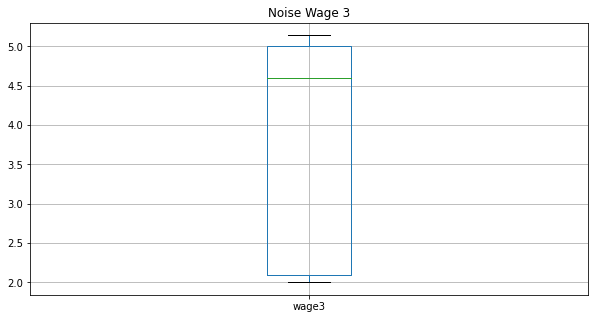

In [200]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability
#
s = pd.Series(df['wage3'])
count_neg = 0
count_zero = 0
count_pos_out_of_range = 0
count_neg_out_of_range = 0
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if positive but not in range
    if 2.0 > x > 0:
        count_pos_out_of_range += 1
    # check if negative and if would be positive are out of range
    if 0 > x > -2.0 or x < -7.0:
        count_neg_out_of_range += 1
    # check if is 0
    if x == 0:
        count_zero += 1
    if x < 0:
        count_neg += 1

print('Acceptable range: [2.0 - 7.0]\n')
print('Zeros: ' + str(count_zero))
print('Negative: ' + str(count_neg))
print('Negative out of range if would be positive: ' + str(count_neg_out_of_range))
print('Positive in range 0 to 2.0: ' + str(count_pos_out_of_range))
print('Positive in range > 7.0: ' + str(count_pos_out_of_range_upper))
print('Min: ' + str(df.wage3.min()))
print('Max: ' + str(df.wage3.max()))

# making negative to positive
# df.wage3 = df.wage3.abs()
#
# print('---- converted to positive ----\n')
# print('Negative: ' + str(df.wage3.lt(0).sum()) + '\n')


# check if a value is missing
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# remove values < 0.0
df.loc[df.wage3 < 0.0, 'wage3'] = np.nan
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Min: ' + str(df.wage3.min()))
print('Max: ' + str(df.wage3.max()))
df.loc[df.wage3 < 2.0, 'wage3'] = 2.0
print('Min: ' + str(df.wage3.min()))
print('Max: ' + str(df.wage3.max()))

# check noise
df.boxplot(
    column=['wage3'],
    figsize=(10, 5))
plt.title('Noise Wage 3')
plt.savefig('exports/06_wage3_noise.pdf')
plt.show()
